<a href="https://colab.research.google.com/github/willdphan/private-vs-public-uni/blob/main/Private_vs_Public_Universities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# University Classification - Private vs Public

This dataset offers a snapshot of US colleges as presented in the 1995 issue of US News and World Report. It encapsulates various metrics such as institution type, application figures, student demographics, costs, faculty qualifications, and other notable institutional statistics. The data provides insights into 777 colleges, capturing both private and public institutions.

For this project we will attempt to use K-Means Clustering to cluster Universities into to two groups, Private and Public. Mostly to experiment and learn.

K-Means Clustering is an unsupervised learning technique. Unlike typical supervised methods, K-Means classifies data without prior knowledge of labeled data. After defining the clusters, new data can be readily placed into its appropriate group.

Typically, the K-Means algorithm is employed when data labels are unavailable. In this scenario, while we'll leverage the labels to gauge the algorithm's performance, it's unconventional to do so with K-Means. Consequently, the resulting classification report and confusion matrix aren't representative of a genuine real-world application of the algorithm.

Dataset is from [Kaggle](https://www.kaggle.com/datasets/flyingwombat/us-news-and-world-reports-college-data)

> ## Steps to K-Means

>>[Import Libraries](#scrollTo=pZYyC_rXXqMy)

>>[Read Data](#scrollTo=Xqv3ZtjnXqMz)

>>[Check info() and describe() Methods on Dataset](#scrollTo=2xy0BtvKXqM0)

>>[Exploratory Data Analysis (EDA)](#scrollTo=CoKunExKXqM0)

>>[Create KMeans Model](#scrollTo=4QGALdjjXqM1)

>>[Evaluation](#scrollTo=RXuE9QA0XqM1)

>>[Scaling the data](#scrollTo=Bemk867EXqM2)


### 1. Import Libraries

Import the libraries uses for data analysis.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Metrics
from sklearn.metrics import classification_report, confusion_matrix

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Model
from sklearn.cluster import KMeans

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 2. Read Data

In [ ]:
data = pd.read_csv("/kaggle/input/college-data/data.csv")
data.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### 3. Check info() and describe() Methods on Dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    object 
 1   apps         777 non-null    int64  
 2   accept       777 non-null    int64  
 3   enroll       777 non-null    int64  
 4   top10perc    777 non-null    int64  
 5   top25perc    777 non-null    int64  
 6   f_undergrad  777 non-null    int64  
 7   p_undergrad  777 non-null    int64  
 8   outstate     777 non-null    int64  
 9   room_board   777 non-null    int64  
 10  books        777 non-null    int64  
 11  personal     777 non-null    int64  
 12  phd          777 non-null    int64  
 13  terminal     777 non-null    int64  
 14  s_f_ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  expend       777 non-null    int64  
 17  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [ ]:
pd.set_option('display.float', '{:.2f}'.format)
data.describe()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00
mean,3001.64,2018.80,779.97,27.56,55.80,3699.91,855.30,10440.67,4357.53,549.38,1340.64,72.66,79.70,14.09,22.74,9660.17,65.46
std,3870.20,2451.11,929.18,17.64,19.80,4850.42,1522.43,4023.02,1096.70,165.11,677.07,16.33,14.72,3.96,12.39,5221.77,17.18
min,81.00,72.00,35.00,1.00,9.00,139.00,1.00,2340.00,1780.00,96.00,250.00,8.00,24.00,2.50,0.00,3186.00,10.00
25%,776.00,604.00,242.00,15.00,41.00,992.00,95.00,7320.00,3597.00,470.00,850.00,62.00,71.00,11.50,13.00,6751.00,53.00
50%,1558.00,1110.00,434.00,23.00,54.00,1707.00,353.00,9990.00,4200.00,500.00,1200.00,75.00,82.00,13.60,21.00,8377.00,65.00
75%,3624.00,2424.00,902.00,35.00,69.00,4005.00,967.00,12925.00,5050.00,600.00,1700.00,85.00,92.00,16.50,31.00,10830.00,78.00
max,48094.00,26330.00,6392.00,96.00,100.00,31643.00,21836.00,21700.00,8124.00,2340.00,6800.00,103.00,100.00,39.80,64.00,56233.00,118.00


In [ ]:
private = (data['private'] == 'Yes').sum()
non_public = (data['private'] == 'No').sum()

private, non_public

(565, 212)

### 3. Exploratory Data Analysis (EDA)

Create a scatter plot to display how graduation rates and room board price differ in private and non-private schools.

Analyze private and non-private schools on their graduation rate and room board.

As noted below, we see that those higher costs for room_board are more likely to go to a private school.

Those who go to a non-private school are less likely to graduate and have a lower fee when it comes to room_board.

<Axes: xlabel='room_board', ylabel='grad_rate'>

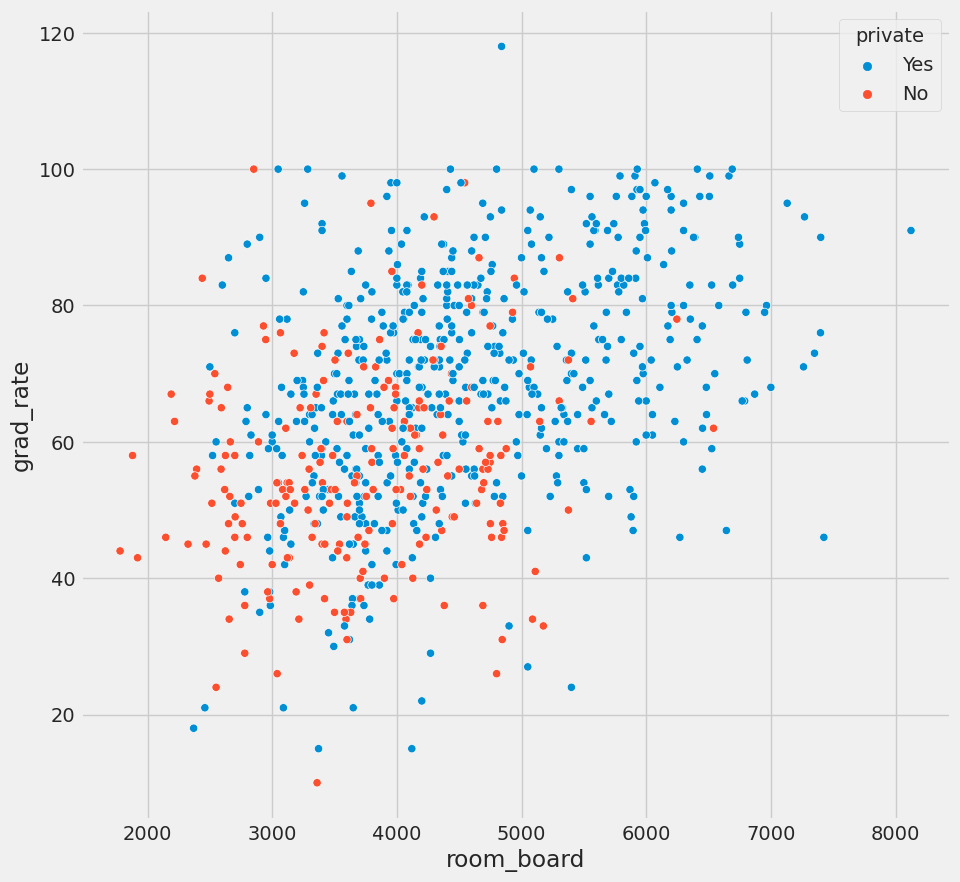

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='room_board', y='grad_rate', data=data, hue='private')

Create a scatter plot to display how number of full time undergraduates and number of state stuydents differ in private and non-private schools.

As seen below, there are more full time undergraduates for non-private schools compared to private schools.

However, there are more private schools out of state compared to non-private schools.

<Axes: xlabel='outstate', ylabel='f_undergrad'>

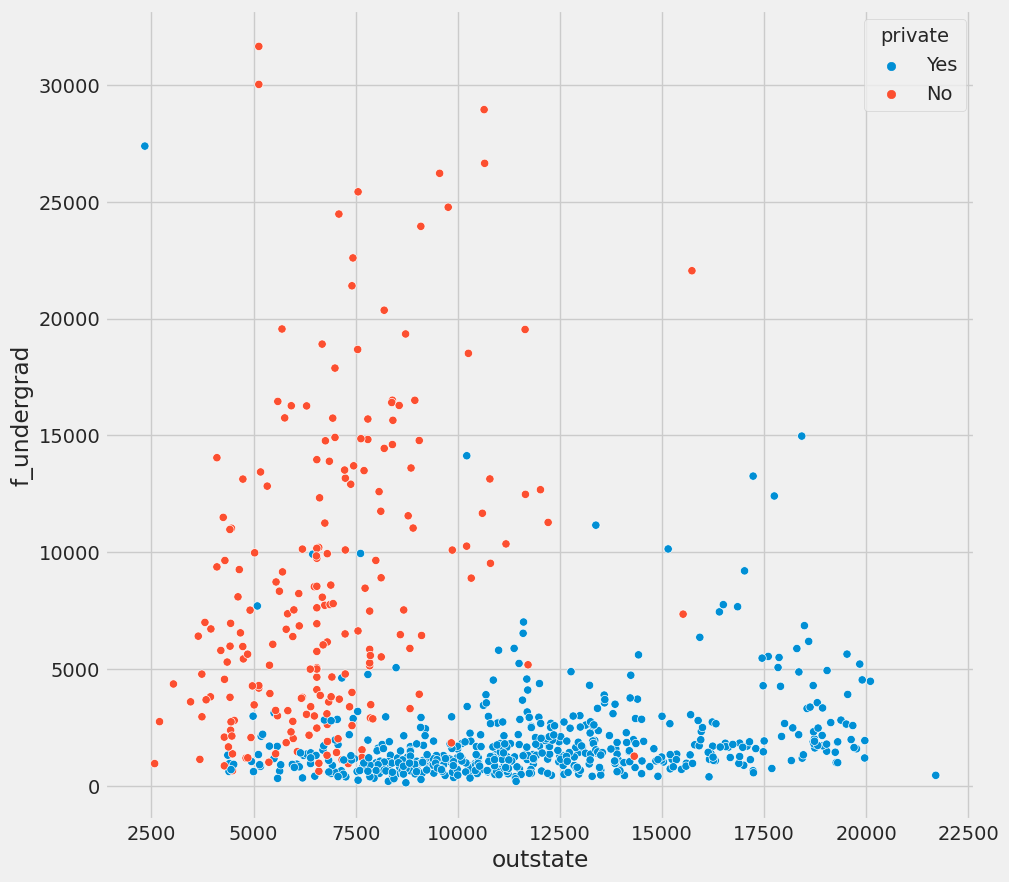

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='outstate', y='f_undergrad', data=data, hue='private')

Below are histograms that visually display the difference between private and non-private collages for the two variables.

Non-private colleges are less likely to be out of state.

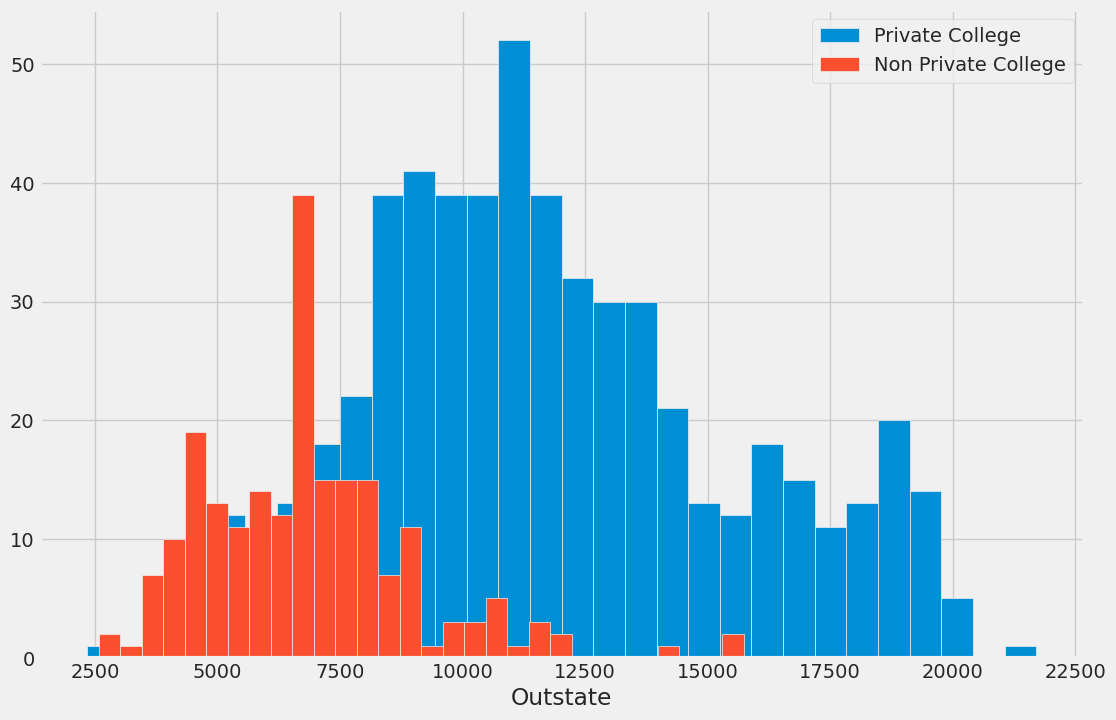

In [ ]:
plt.figure(figsize=(12, 8))

data.loc[data.private == 'Yes', 'outstate'].hist(label="Private College", bins=30)
data.loc[data.private == 'No', 'outstate'].hist(label="Non Private College", bins=30)

plt.xlabel('Outstate')
plt.legend()

The graduation rate for private colleges is higher than non-private colleges

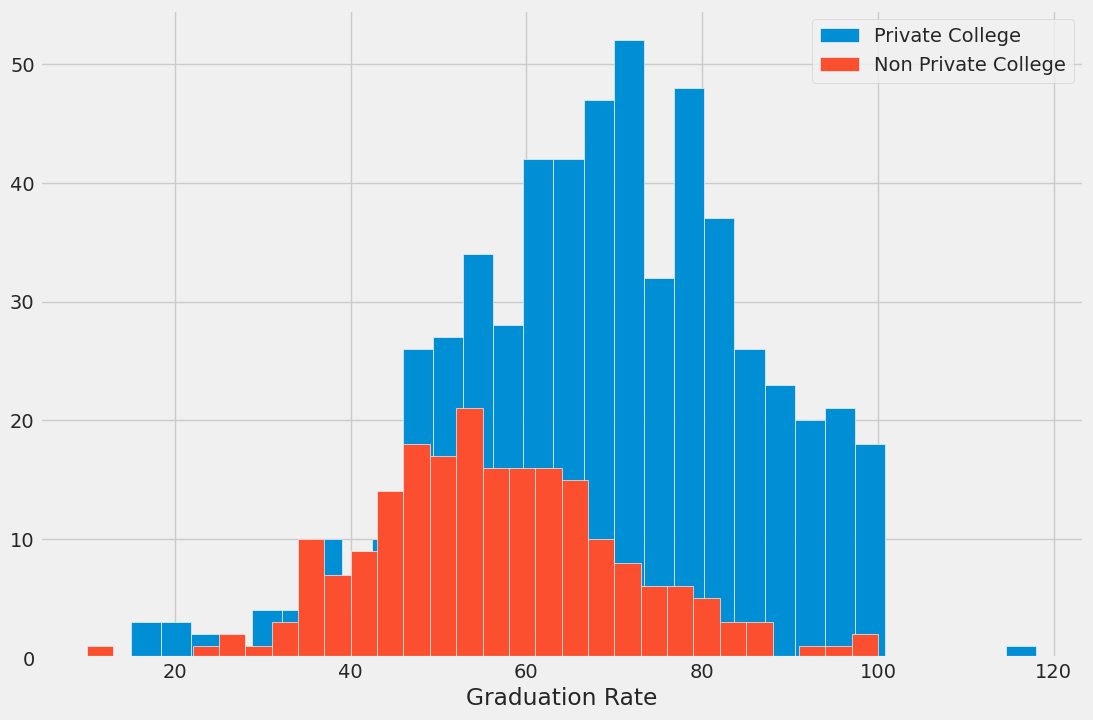

In [ ]:
plt.figure(figsize=(12, 8))

data.loc[data.private == 'Yes', 'grad_rate'].hist(label="Private College", bins=30)
data.loc[data.private == 'No', 'grad_rate'].hist(label="Non Private College", bins=30)

plt.xlabel('Graduation Rate')
plt.legend()

There is an outlier near 120 mark! Here, we locate it and analyze why this is the case.

In [ ]:
data.loc[data.grad_rate > 100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.30,20,7697,118


It's weird that it is above 100% (it's 118%). In terms of percentages, it's generally not accepted for a metric to be above 100%. So, lets re-enter the value for this data point to be 100.

In [ ]:
data.loc[data.grad_rate > 100, 'grad_rate'] = 100

Now, there are no values above 100%.

In [ ]:
data.loc[data.grad_rate > 100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate


Below, we visualize the graph again to check if the outlier still exists. Now, it is gone!

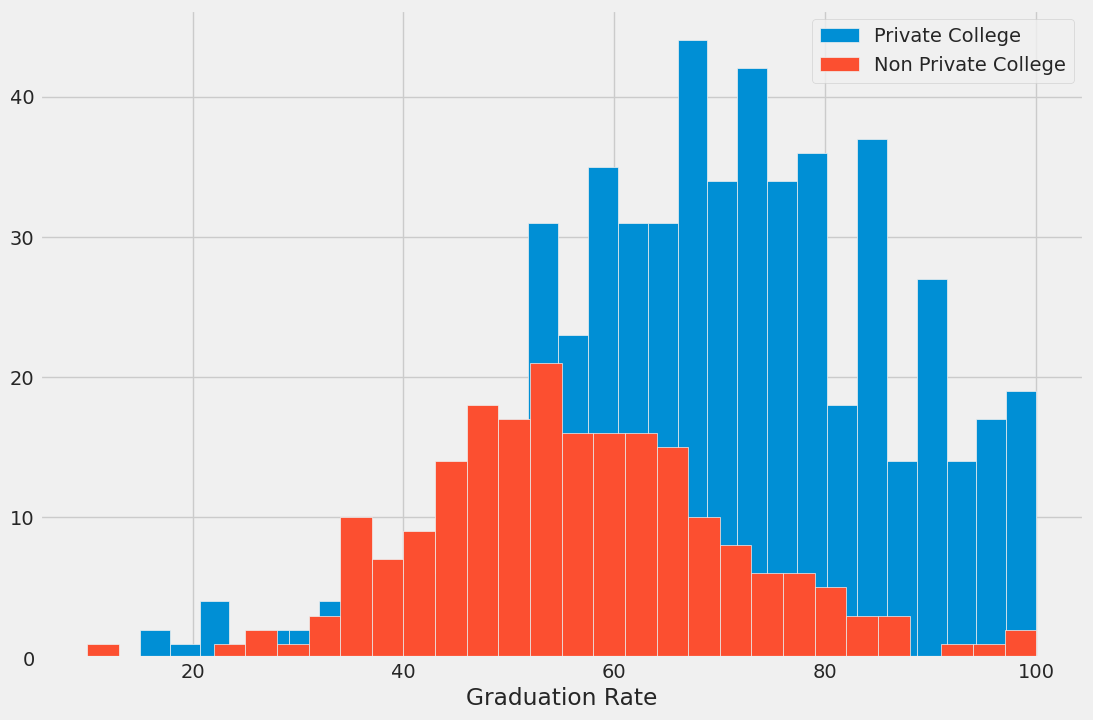

In [ ]:
plt.figure(figsize=(12, 8))

data.loc[data.private == 'Yes', 'grad_rate'].hist(label="Private College", bins=30)
data.loc[data.private == 'No', 'grad_rate'].hist(label="Non Private College", bins=30)

plt.xlabel('Graduation Rate')
plt.legend()

### Create KMeans Model

Using the KMeans model from sklearn, we can import KMeans. KMeans(2) creates an instance of the KMeans algorithm.
The number 2 signifies that you want to segment the data into two clusters.

In [ ]:
kmeans = KMeans(2)

Fit the model to all the data except for the Private label. In other words, exclude the results or output column.

In [ ]:
kmeans.fit(data.drop('private', axis=1))

KMeans(n_clusters=2)

Check the cluster vectors.

In [ ]:
kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

### 5. Evaluation

Evaluating clustering is challenging without actual labels. For this exercise, we have the luxury of labels to assess our clusters, a privilege often absent in real-world scenarios.

Here, we add a column to the df, assigning 1 for Private schools and 0 for public ones. Essentially, a binary representation.

In [ ]:
data['private'] = data.private.astype("category").cat.codes

Now look at datatype for private column. It's now an int8.

In [ ]:
data.private

0      1
1      1
2      1
3      1
4      1
      ..
772    0
773    1
774    1
775    1
776    1
Name: private, Length: 777, dtype: int8

In [ ]:
data['private'].value_counts()

1    565
0    212
Name: private, dtype: int64

In [ ]:
data.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.90,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.70,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.90,2,10922,15


kmeans.labels_ returns an array of integers representing the cluster assignments for each data point in the dataset that was fit using the KMeans algorithm.

In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.

In [ ]:
print(confusion_matrix(data.private, kmeans.labels_))
print(classification_report(data.private, kmeans.labels_))

[[ 74 138]
 [ 34 531]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(data.private, kmeans.labels_))
print(pd.DataFrame(classification_report(data.private, kmeans.labels_, output_dict=True)))

0.7786357786357786
               0      1  accuracy  macro avg  weighted avg
precision   0.69   0.79      0.78       0.74          0.76
recall      0.35   0.94      0.78       0.64          0.78
f1-score    0.46   0.86      0.78       0.66          0.75
support   212.00 565.00      0.78     777.00        777.00


### 6. Scaling the data

The provided code segment standardizes the dataset, applies the KMeans clustering algorithm to identify two clusters, and then prints the centers of these clusters.

In [ ]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = data.drop('private', axis=1)
y = data.private

X = scalar.fit_transform(X)

kmeans = KMeans(2)
kmeans.fit(X)

print(kmeans.cluster_centers_)

[[ 0.54548844  0.50988814  0.41992248  0.83361106  0.83951561  0.36917718
   0.06427689  0.76478882  0.6226721   0.20329475 -0.08142105  0.81940114
   0.80008284 -0.39387442  0.51295406  0.70919469  0.60419735]
 [-0.32661962 -0.30530339 -0.25143507 -0.49913749 -0.50267293 -0.22105053
  -0.03848678 -0.45792911 -0.37283453 -0.12172587  0.04875211 -0.49062908
  -0.47906195  0.23583839 -0.30713916 -0.42464126 -0.36177249]]


Considering the algorithm is purely using the features to cluster the universities into 2 distinct groups, it works pretty well! We see how K Means is useful for clustering un-labeled data!

While you can technically compute a classification report for KMeans when you have true labels, it doesn't provide a meaningful or consistent measure of cluster quality. Other metrics, like silhouette score or inertia, are often more informative for evaluating the quality of clusters created by KMeans.

In [ ]:
print(accuracy_score(y, kmeans.labels_))
print(confusion_matrix(y, kmeans.labels_))

0.5225225225225225
[[ 66 146]
 [225 340]]


In [ ]:
print(classification_report(y, kmeans.labels_))

              precision    recall  f1-score   support

           0       0.23      0.31      0.26       212
           1       0.70      0.60      0.65       565

    accuracy                           0.52       777
   macro avg       0.46      0.46      0.45       777
weighted avg       0.57      0.52      0.54       777

